In [47]:
!pip install tensorflow-gpu==2.0.0.0-rc0

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [0]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [0]:
print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [55]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

fatal: destination path 'Movies-Poster_Dataset' already exists and is not an empty directory.


In [56]:
data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')
data.shape

(7254, 27)

In [57]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:49<00:00, 147.14it/s]


In [0]:
X.shape

(7254, 350, 350, 3)

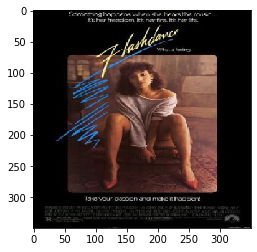

In [0]:
plt.imshow(X[1])

In [0]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [0]:
y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

In [0]:
## Build CNN

In [0]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25,activation='sigmoid'))




In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization_6 (Batch (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 174, 174, 16)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_7 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 86, 86, 32)       

In [0]:
model.compile(optimer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
6165/6165 [==============================] - 213s 35ms/sample - loss: 0.6751 - accuracy: 0.6589 - val_loss: 0.3305 - val_accuracy: 0.8819
Epoch 2/5
6165/6165 [==============================] - 202s 33ms/sample - loss: 0.2987 - accuracy: 0.8925 - val_loss: 0.2400 - val_accuracy: 0.9112
Epoch 3/5
6165/6165 [==============================] - 209s 34ms/sample - loss: 0.2538 - accuracy: 0.9084 - val_loss: 0.2374 - val_accuracy: 0.9091
Epoch 4/5
6165/6165 [==============================] - 204s 33ms/sample - loss: 0.2466 - accuracy: 0.9113 - val_loss: 0.2376 - val_accuracy: 0.9089
Epoch 5/5
6165/6165 [==============================] - 202s 33ms/sample - loss: 0.2421 - accuracy: 0.9128 - val_loss: 0.2307 - val_accuracy: 0.9140


In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val',], loc='upper left')
  plt.show()

  # Plot traing & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper_left')
  plt.show()


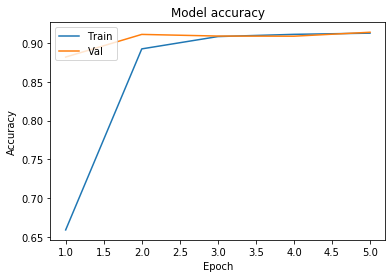

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


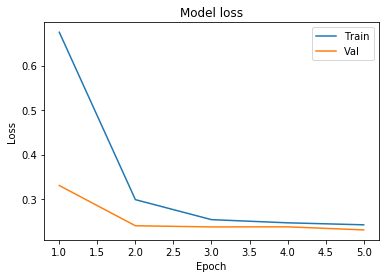

In [0]:
plot_learningCurve(history, 5)

In [0]:
## Testing of model

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Crime
Action


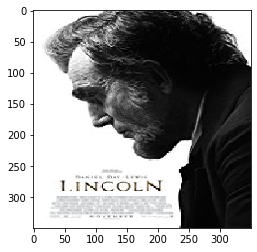

In [59]:
  img = image.load_img('/content/lincoln.jpg', target_size=(img_width, img_height, 3))
  plt.imshow(img)
  img = image.img_to_array(img)
  img = img/255.0

  img = img.reshape(1, img_width, img_height, 3)

  classes = data.columns[2:]
  print(classes)
  y_prob = model.predict(img)
  top3 = np.argsort(y_prob[0])[:-4:-1]
  top3

  for i in range(3):
    print(classes[top3[i]])